# Characteristics that Detremine Car Price

<h2>Table of content</h2>

<div class="alert alert-block alert-info" style="margin-top: 20px">
<ol>
    <li><a href="#import_data">Import Data as Data Frame</a></li>
    <li><a href="#pattern_visualization">Analyzing Individual Feature Patterns using Visualization</a></li>
    <li><a href="#correlation_causation">Correlation and Causation</a></li>
    <li><a href="#anova">ANOVA</a></li>
</ol>
<hr>

<h2 id="import_data">1. Import Data as Data Frame</h2>

### Import Libraries

In [158]:
import pandas as pd
import numpy as np

The dataset was hosted on IBM Cloud.

In [159]:
path='https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/automobileEDA.csv'
df = pd.read_csv(path)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


<h2 id="pattern_visualization">2. Analyzing Individual Feature Patterns using Visualization</h2>

 Import visualization packages "Matplotlib" and "Seaborn" and "%matplotlib inline" to plot in a Jupyter notebook.

In [160]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

plt.style.use(['fivethirtyeight'])

In [161]:
# list the data types for each column
print(df.dtypes)

symboling              int64
normalized-losses      int64
make                  object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
city-L/100km         float64
horsepower-binned     object
diesel                 int64
gas                    int64
dtype: object


### Calculating the Correlation between characteristics of cars in data frame

In [7]:
correlation=df.corr()
p_cor=correlation.loc['price']
p_cor

symboling           -0.082391
normalized-losses    0.133999
wheel-base           0.584642
length               0.690628
width                0.751265
height               0.135486
curb-weight          0.834415
engine-size          0.872335
bore                 0.543155
stroke               0.082310
compression-ratio    0.071107
horsepower           0.809575
peak-rpm            -0.101616
city-mpg            -0.686571
highway-mpg         -0.704692
price                1.000000
city-L/100km         0.789898
diesel               0.110326
gas                 -0.110326
Name: price, dtype: float64


In order to start understanding the (linear) relationship between an individual variable and the price,"regplot", which plots the scatterplot plus the fitted regression line for the data can be used.

Scatter Plot plus the fitted regression line for the highest positive, highest negative and smallest correlation values will be plotted to visually display the relationship.

### Scatterplot of "engine-size" and "price" 

In [8]:
eng_p=df[['engine-size','price']]

Text(0.5, 1.0, 'Relationship between Price & Engine Size')

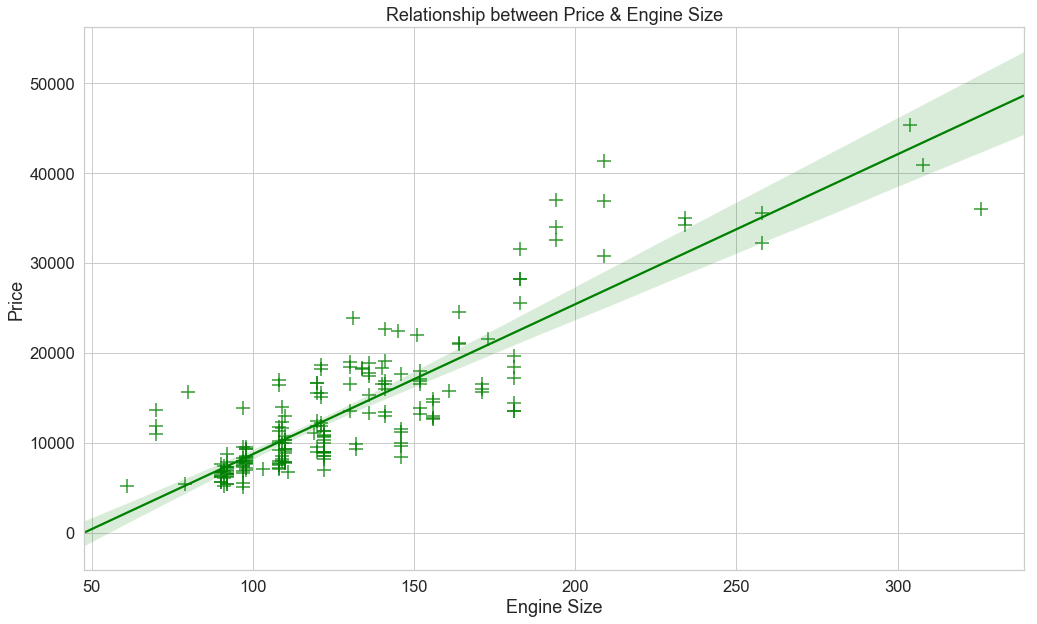

In [9]:
# define figure size
plt.figure(figsize=(15, 10))

# define background style and font size
sns.set(font_scale=1.5)
sns.set_style('whitegrid')

# generate plot and add title and axes labels
ax = sns.regplot(x='engine-size', y='price', data=eng_p, color='green', marker='+', scatter_kws={'s': 200})
ax.set(xlabel='Engine Size', ylabel='Price')
ax.set_title('Relationship between Price & Engine Size')

As the engine-size goes up, the price goes up indicating a positive direct correlation between
these two variables. 
Engine size seems like a pretty good predictor of price since the regression line is almost a perfect diagonal line.

We can examine the correlation between ’engine-size’ and ’price’ and see it’s approximately 0.87.

In [10]:
p_cor.loc['engine-size']

0.8723351674455199

### Scatterplot of "highway-mpg" and "price" 

In [11]:
highway_p=df[['highway-mpg','price']]

Text(0.5, 1.0, 'Relationship between Highway-mpg & Price')

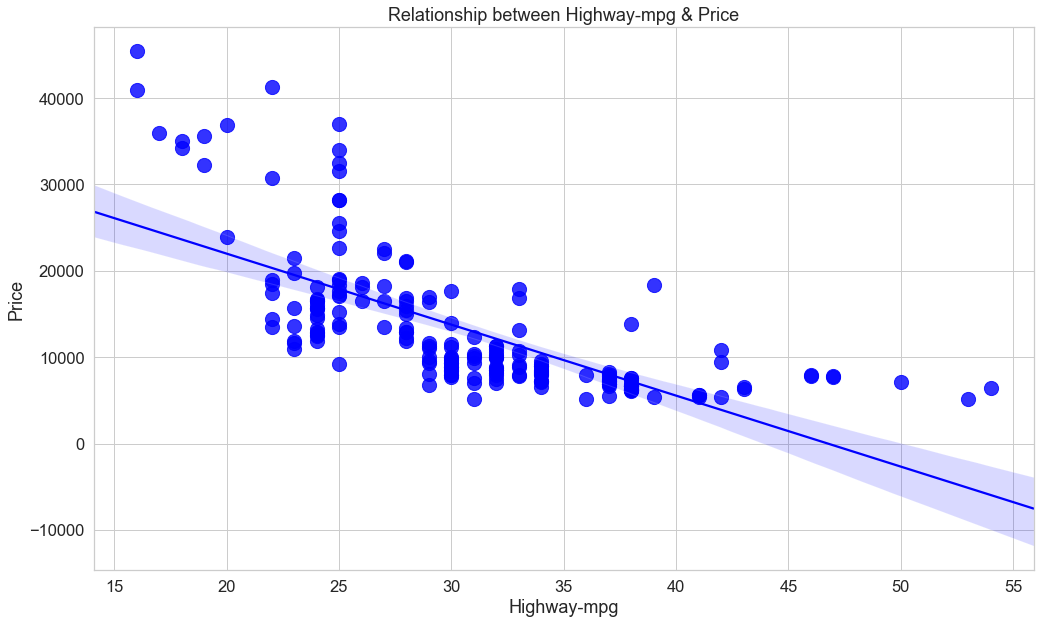

In [12]:
# define figure size
plt.figure(figsize=(15, 10))

# define background style and font size
sns.set(font_scale=1.5)
sns.set_style('whitegrid')

# generate plot and add title and axes labels
ax = sns.regplot(x='highway-mpg', y='price', data=highway_p, color='blue', marker='o', scatter_kws={'s': 200})
ax.set(xlabel='Highway-mpg', ylabel='Price')
ax.set_title('Relationship between Highway-mpg & Price')

As the highway-mpg goes up, the price goes down: this indicates an inverse/negative relationship 
between these two variables. Highway mpg could potentially be a predictor of price.

We can examine the correlation between ’highway-mpg’ and ’price’ and see it’s approximately
-0.704

In [45]:
p_cor.loc['highway-mpg']

-0.7046922650589532

### Scatterplot of "compressio-ratio" and "price" 

Text(0.5, 1.0, 'Relationship between Compression-Ratio & Engine Size')

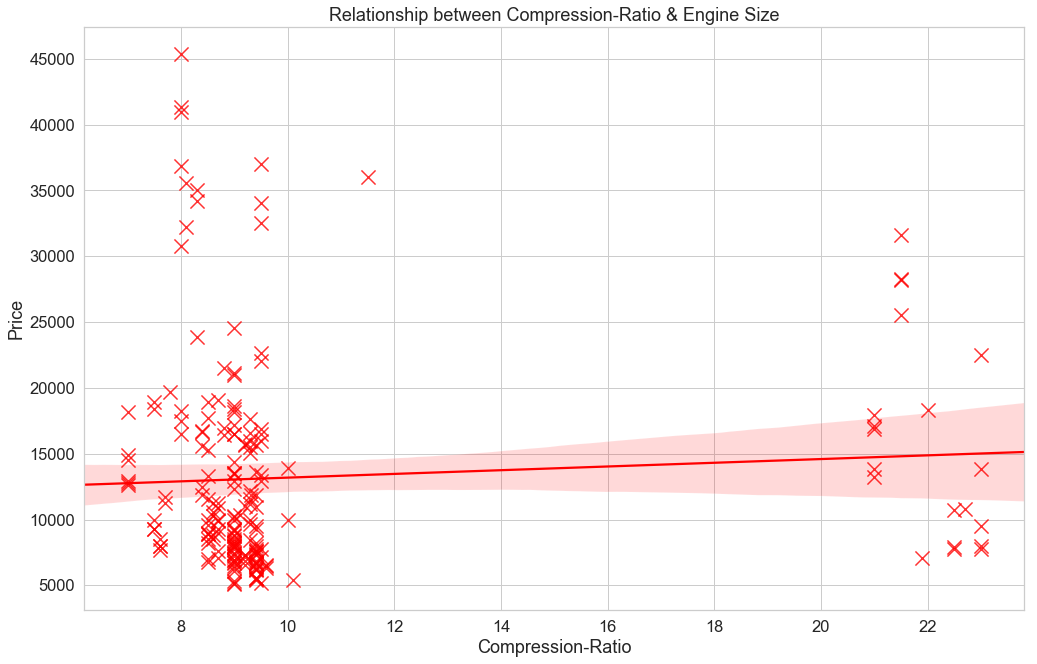

In [64]:
compression_p=df[['compression-ratio','price']]

# define figure size
plt.figure(figsize=(15, 10))

# define background style and font size
sns.set(font_scale=1.5)
sns.set_style('whitegrid')

# generate plot and add title and axes labels
ax = sns.regplot(x='compression-ratio', y='price', data=compression_p, color='red', marker='x', scatter_kws={'s': 200})
ax.set(xlabel='Compression-Ratio', ylabel='Price')
ax.set_title('Relationship between Compression-Ratio & Engine Size')

Compression ratio does not seem like a good predictor of the price at all since the regression line is close to horizontal. 

Also, the data points are very scattered and far from the fitted line, showing lots of
variability. Therefore it’s it is not a reliable variable.

We can examine the correlation between ’peak-rpm’ and ’price’ and see it’s approximately 0.0711.

In [102]:
p_cor.loc['compression-ratio']

0.07110732668194146

## Categorical variables

Categorical variables describe a ’characteristic’ of a data unit, and are selected from a small group of categories. The categorical variables can have the type "object" or "int64". A good way to visualize categorical variables is by using boxplots.

In [37]:
print(df.dtypes)

symboling              int64
normalized-losses      int64
make                  object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
city-L/100km         float64
horsepower-binned     object
diesel                 int64
gas                    int64
dtype: object


In [38]:
df_obj=df.select_dtypes(include='object')
df_int64=df.select_dtypes(include='int64')

In [39]:
col=df_obj.columns.tolist()
col.insert(0,'price')
col2=df_int64.columns.tolist()
col2.insert(0,'price')

In [40]:
obj=df[col]
int=df[col2]

### Creating a Dictionary for Plotting Box Plots

The distributions of price between the different characteristsics that are distinct enough, represent characteristics that are a potential good predictor of price.

#### Variables with type object

In [122]:
d={}
for i in range(1,len(col)):
    d[i]=obj[['price',col[i]]]

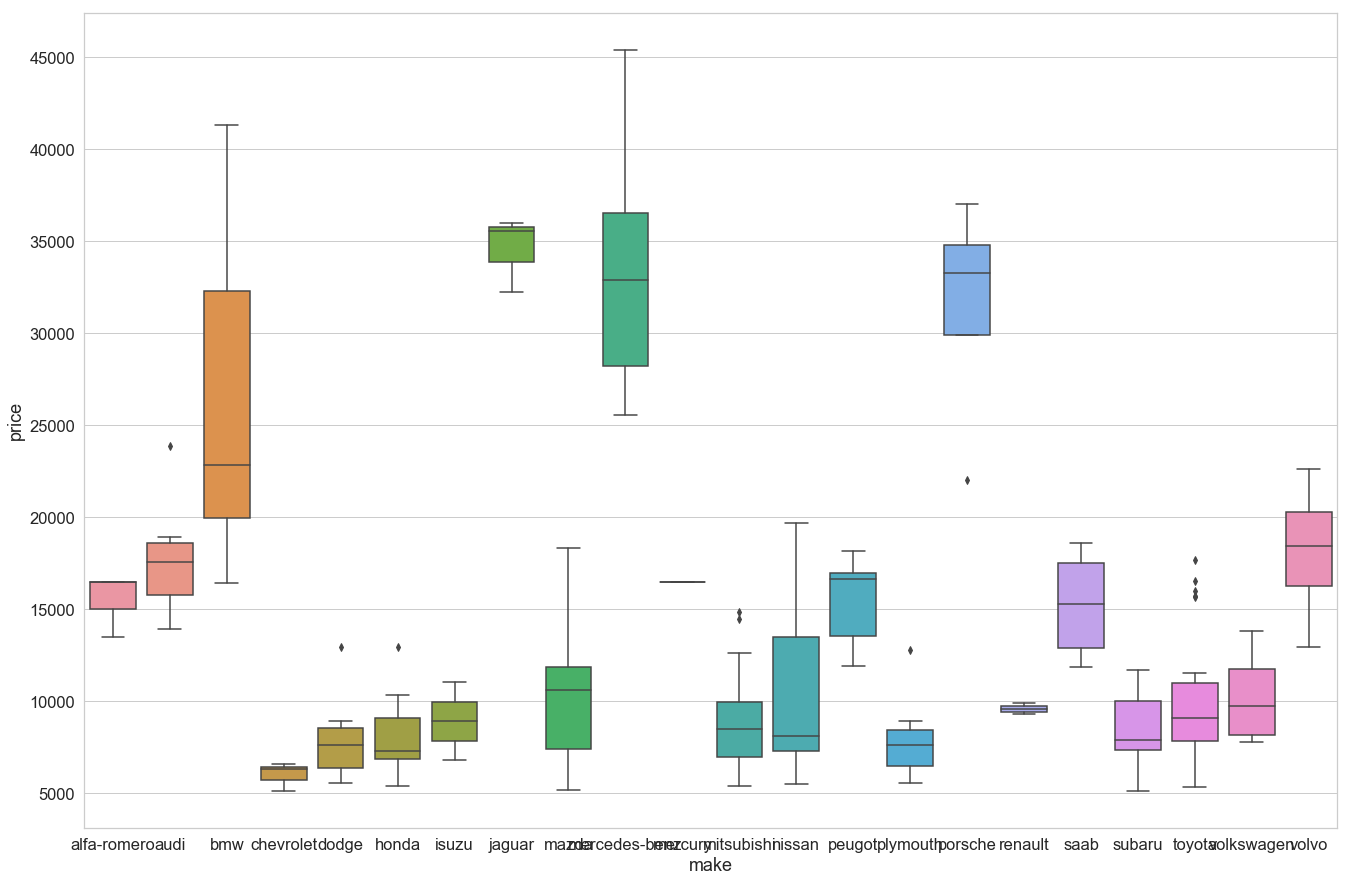

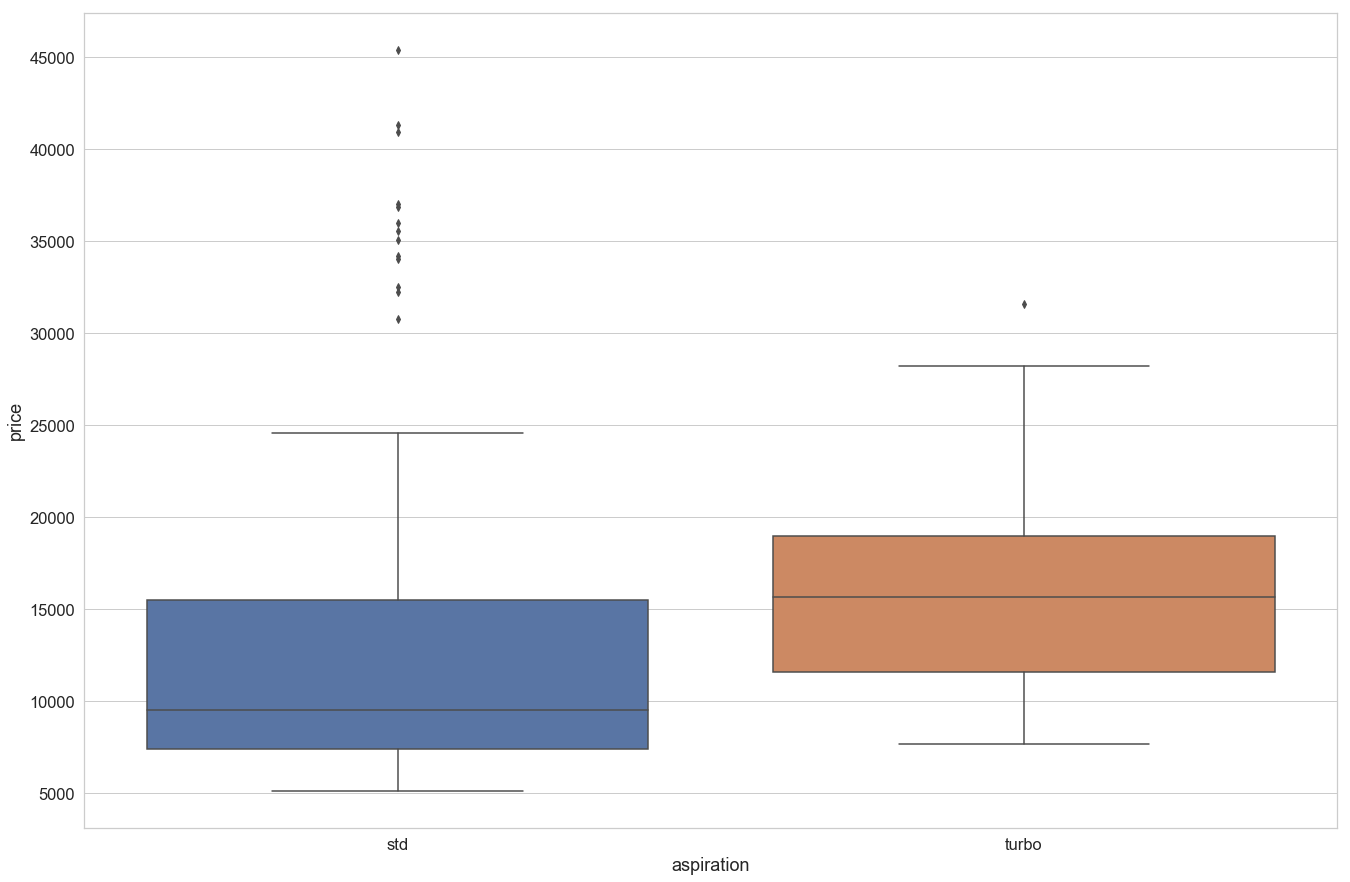

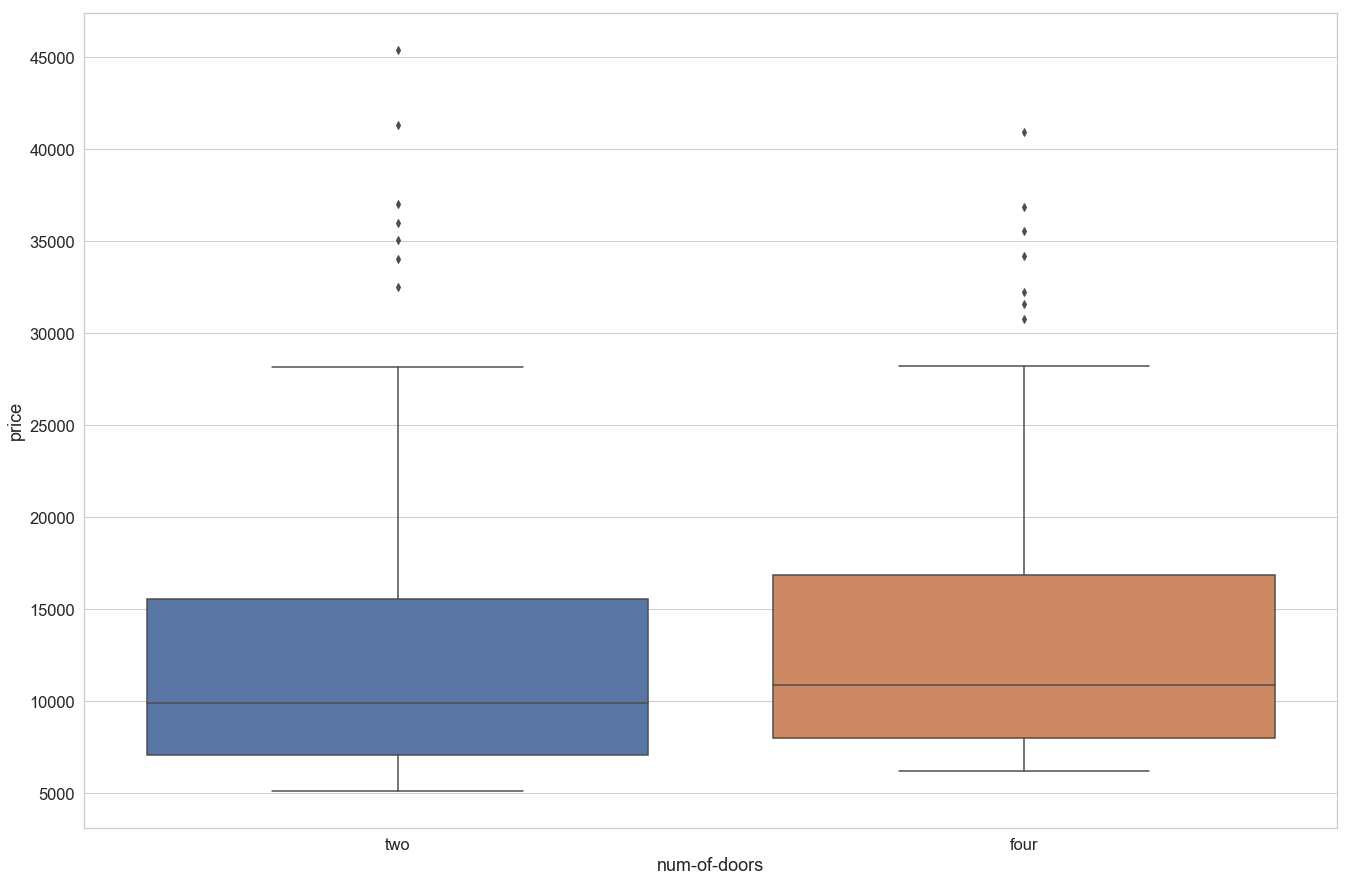

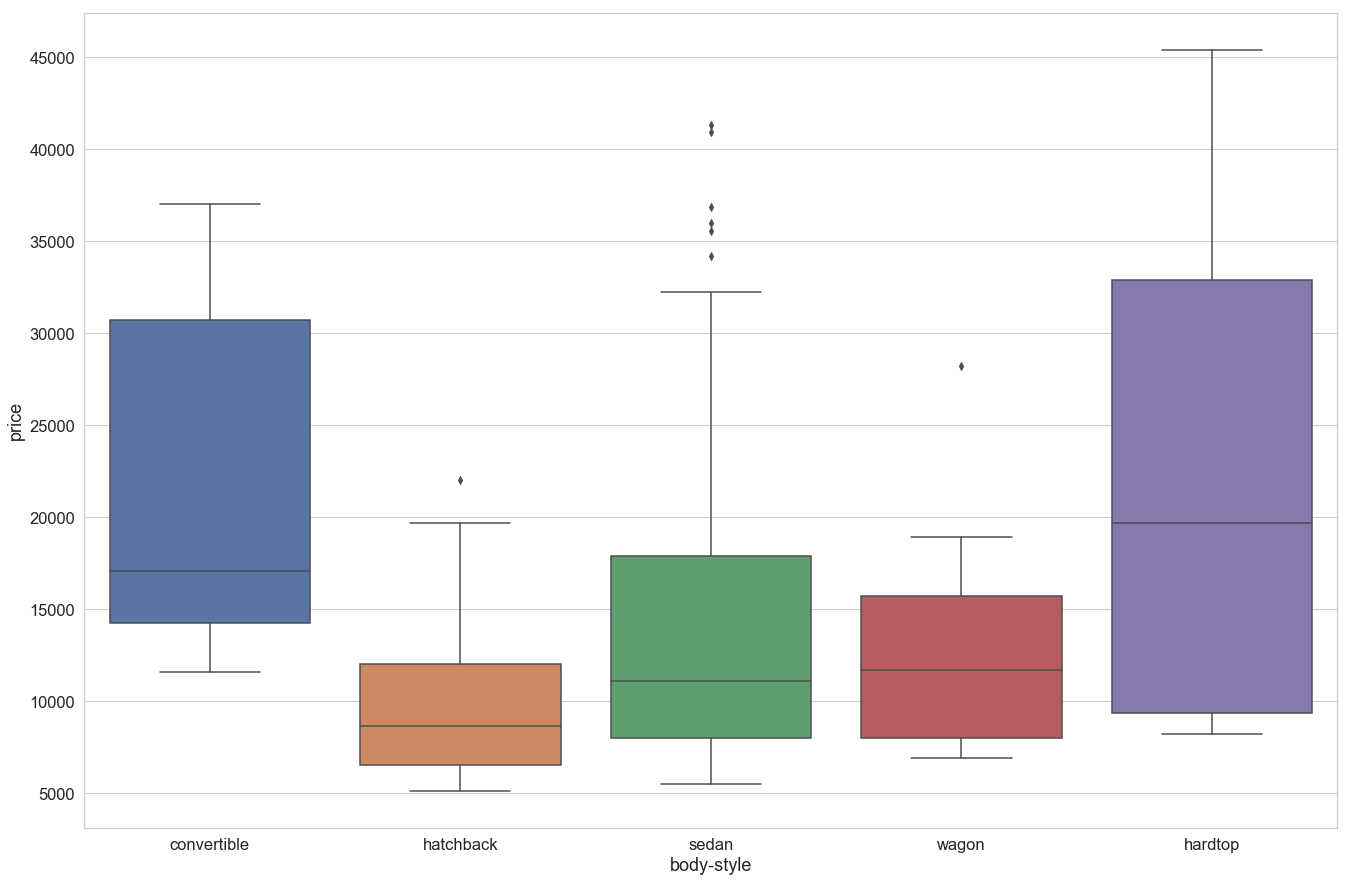

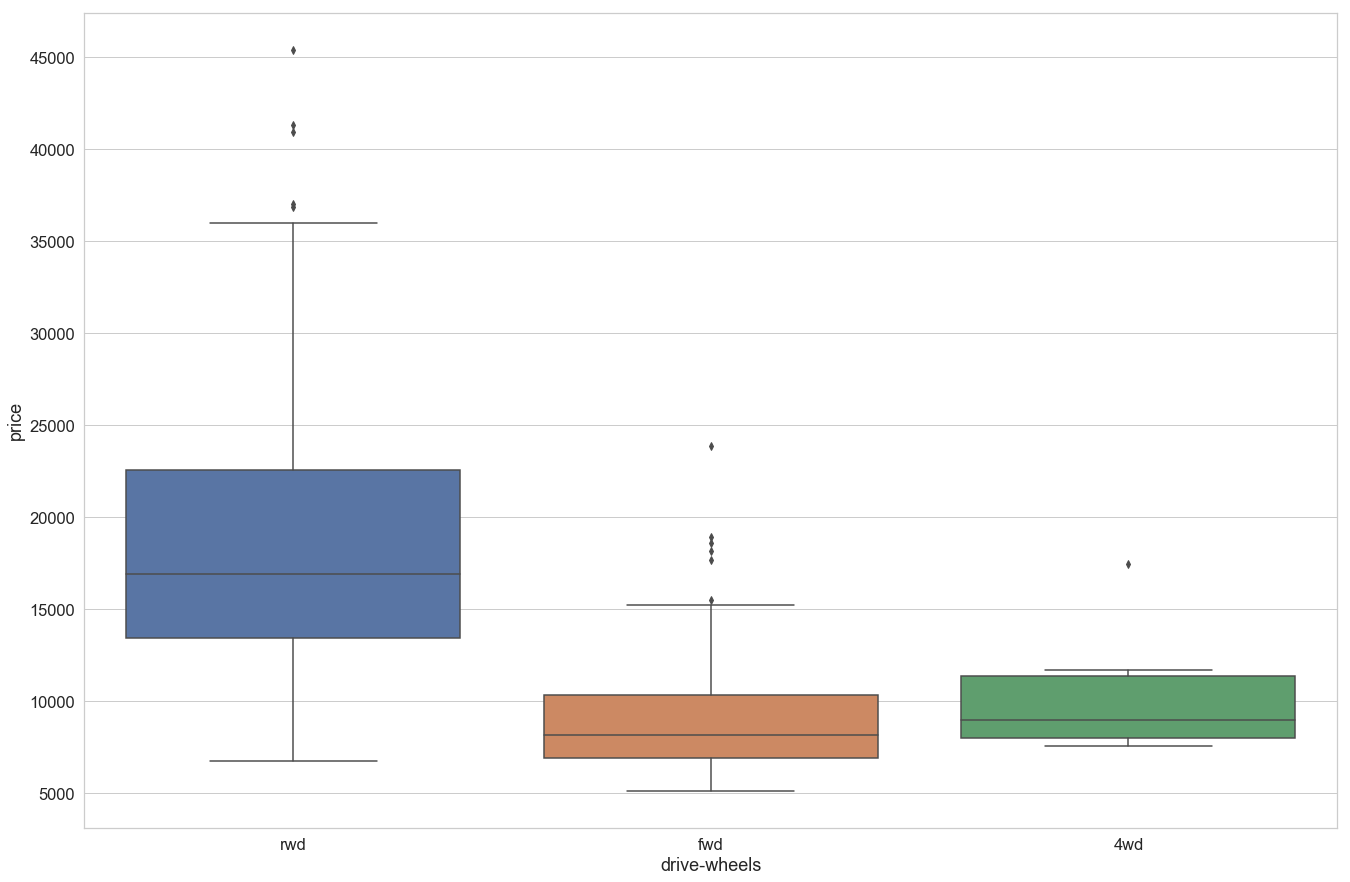

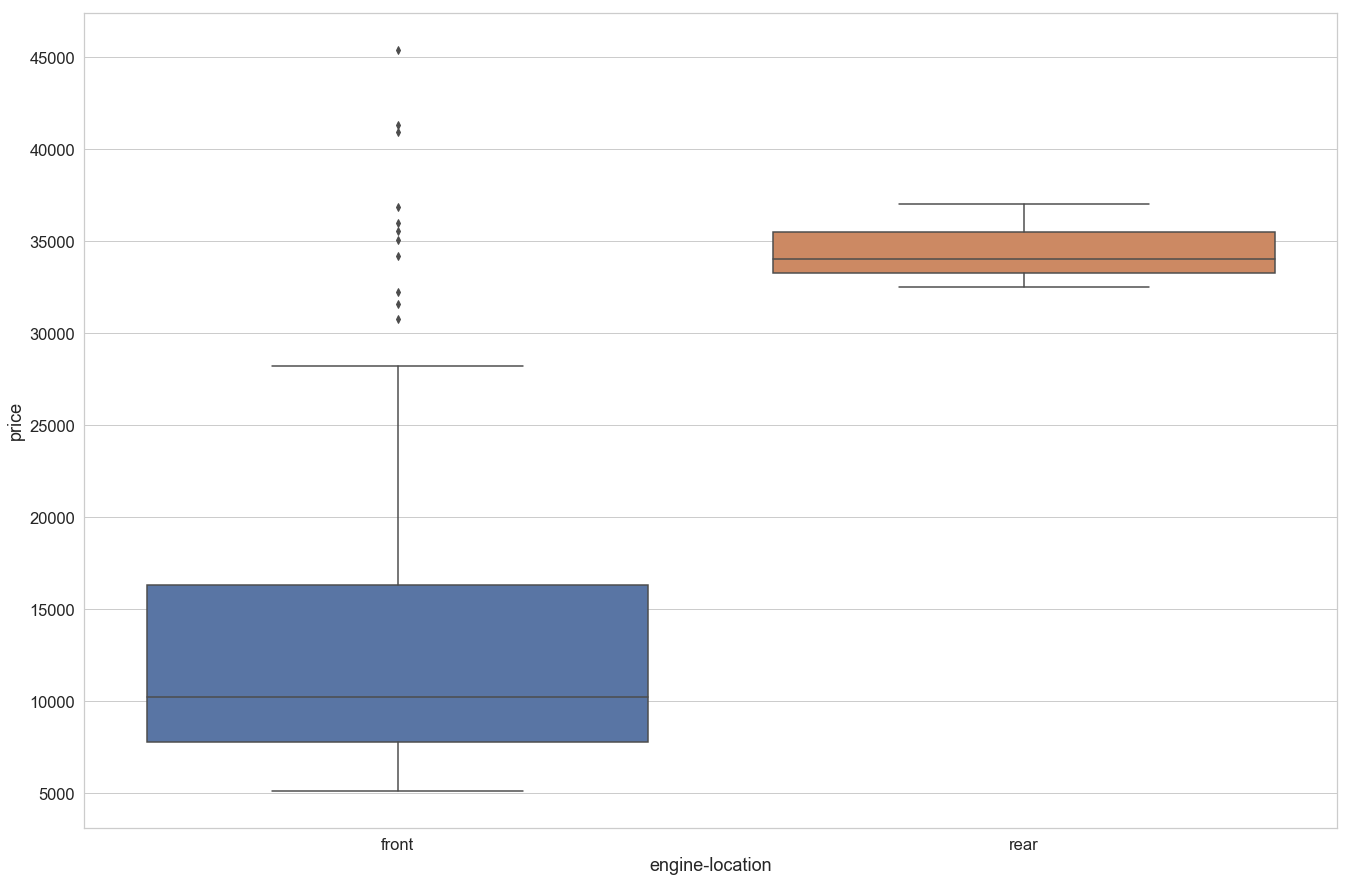

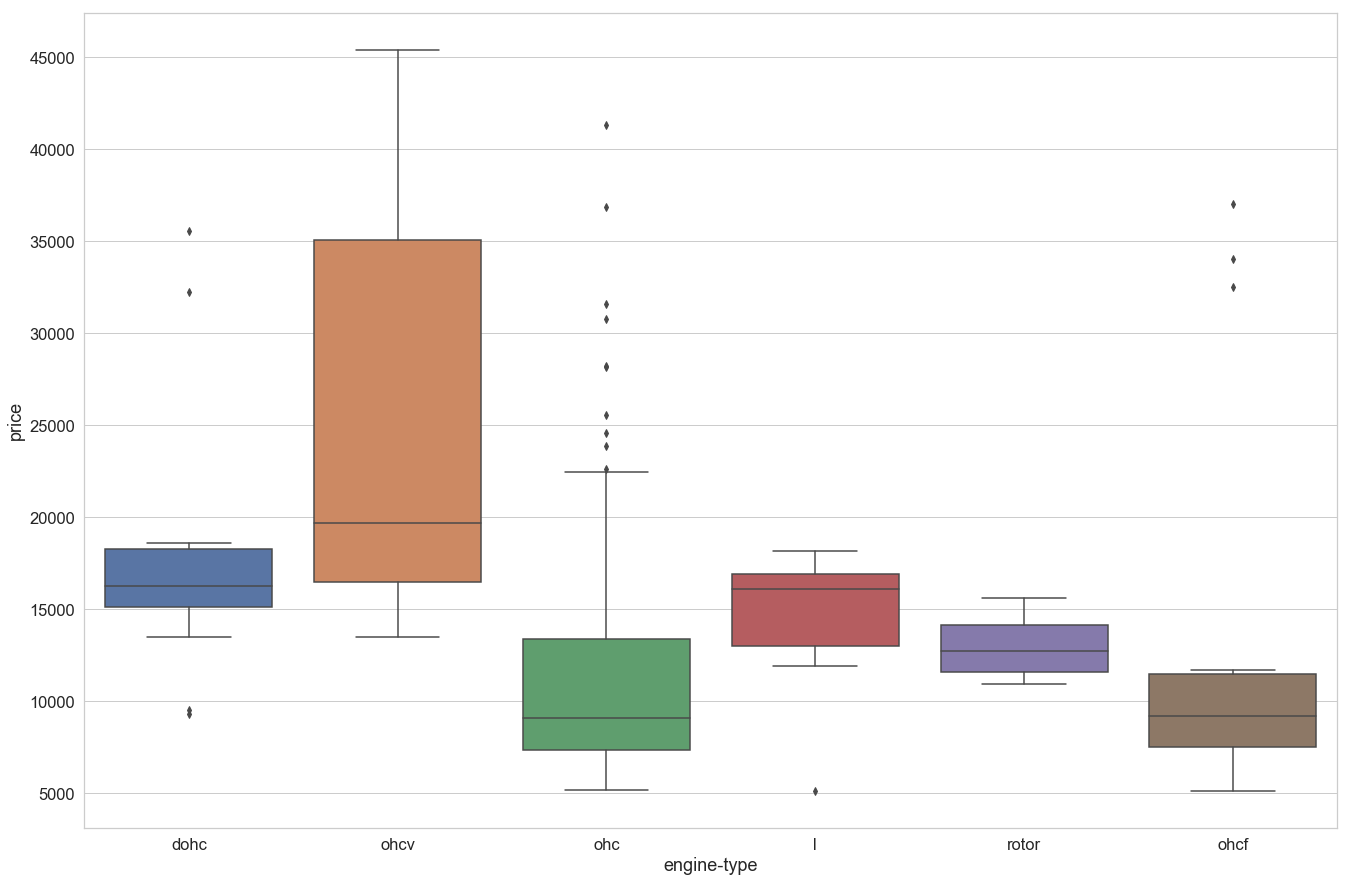

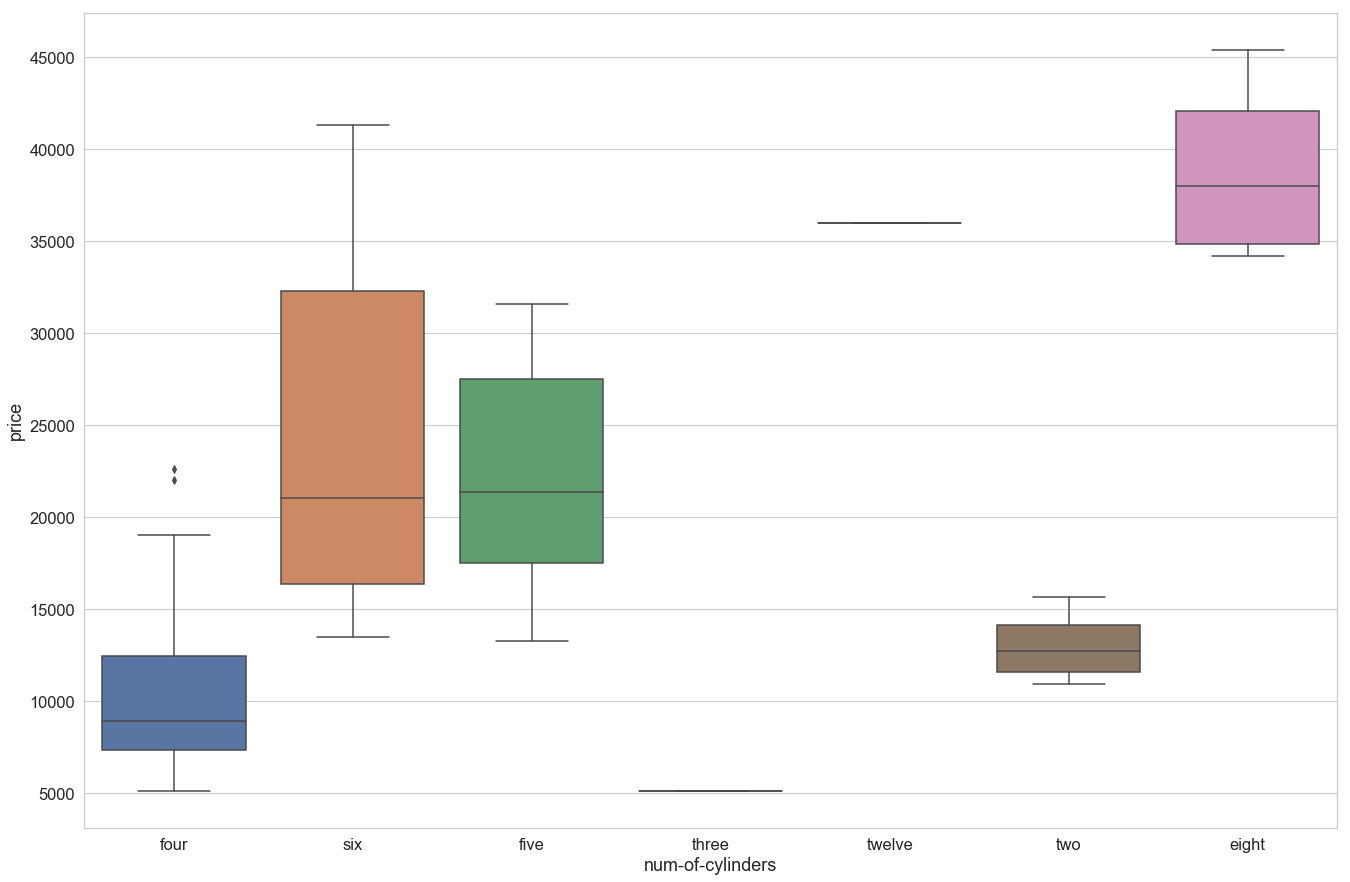

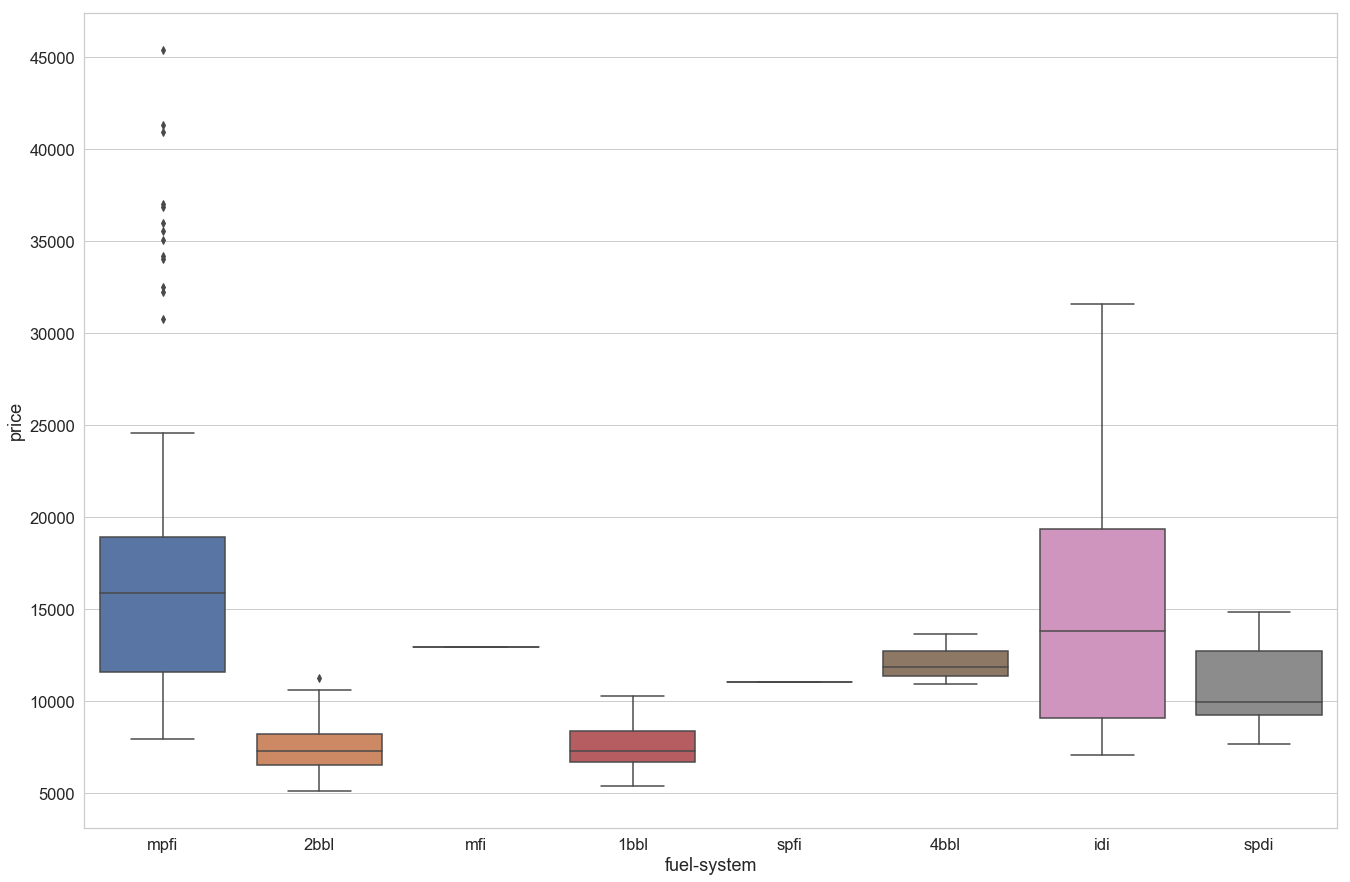

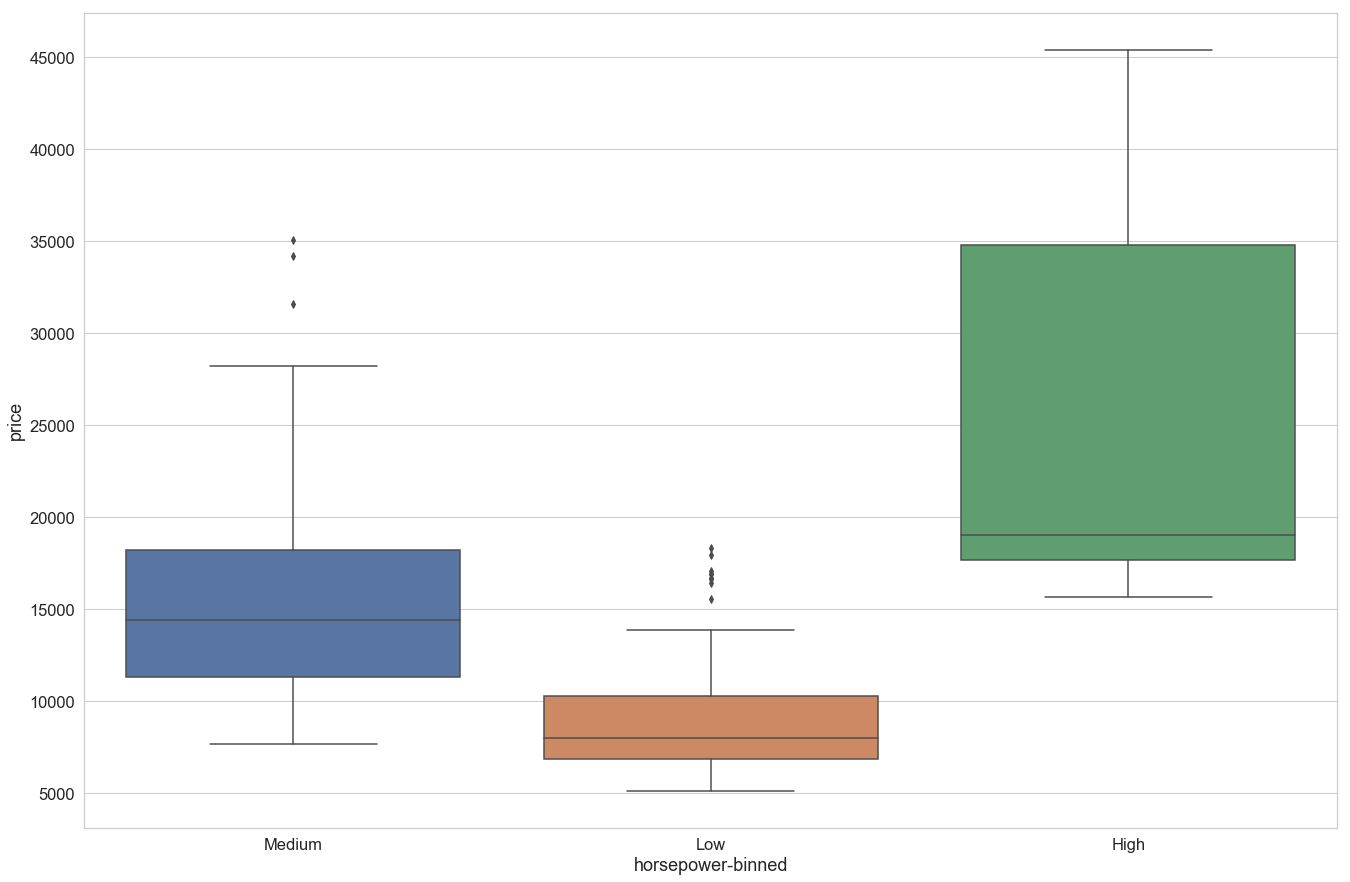

In [123]:
for key in d:
    u=d[key].columns
    plt.figure(figsize=(20, 15))
    sns.boxplot(x=u[1], y="price",data=d[key])

From the above plots it can be observed that the characteristics: 

1. Horsepower-binned 
2. Engine Location

are the possible characteristics that could be great predictors of price given that the respective categories price range is distinct.

#### Variables with Type Int64

In [120]:
e={}
for i in range(1,len(col2)):
    e[i]=int[['price',col2[i]]]

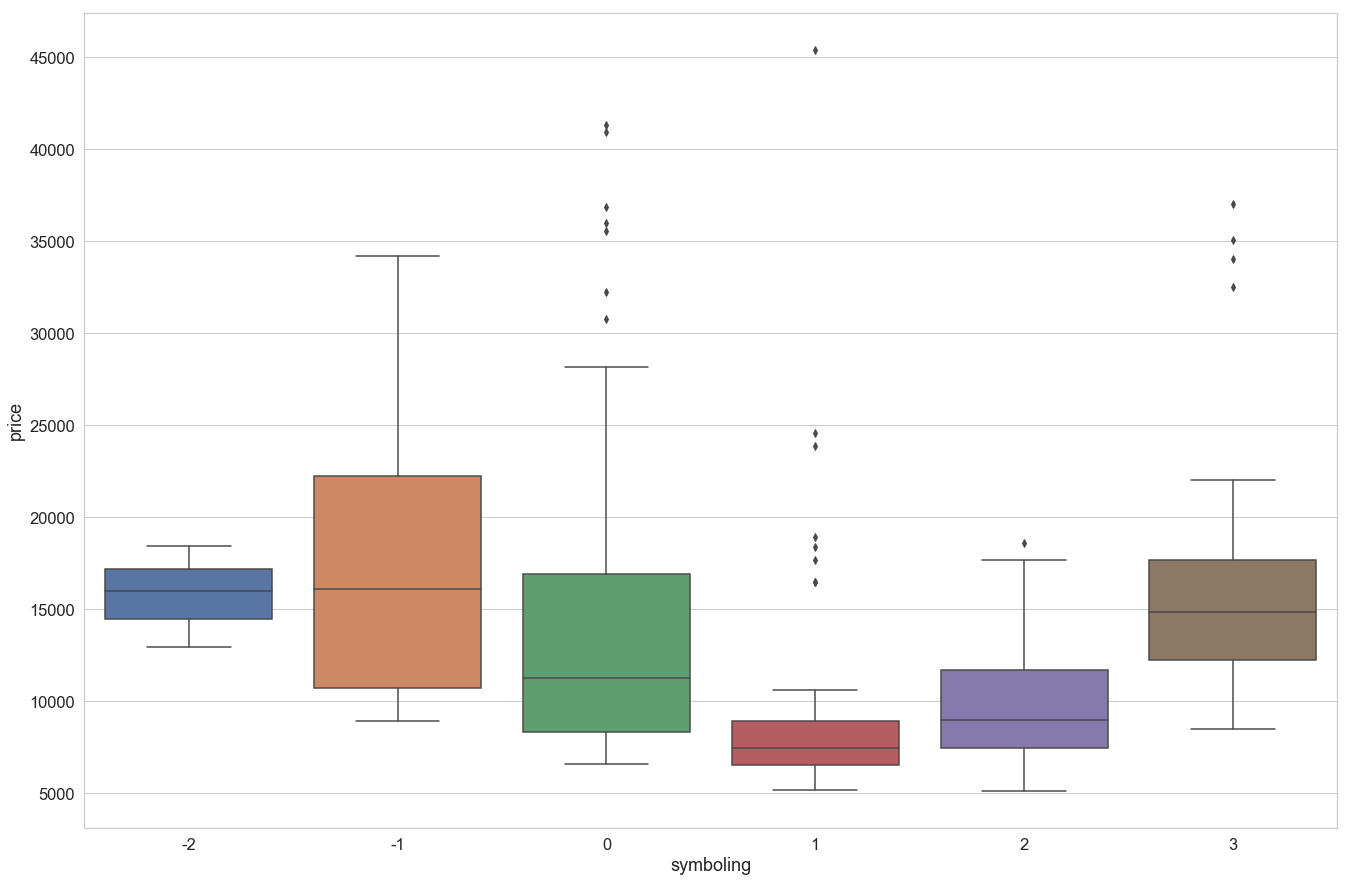

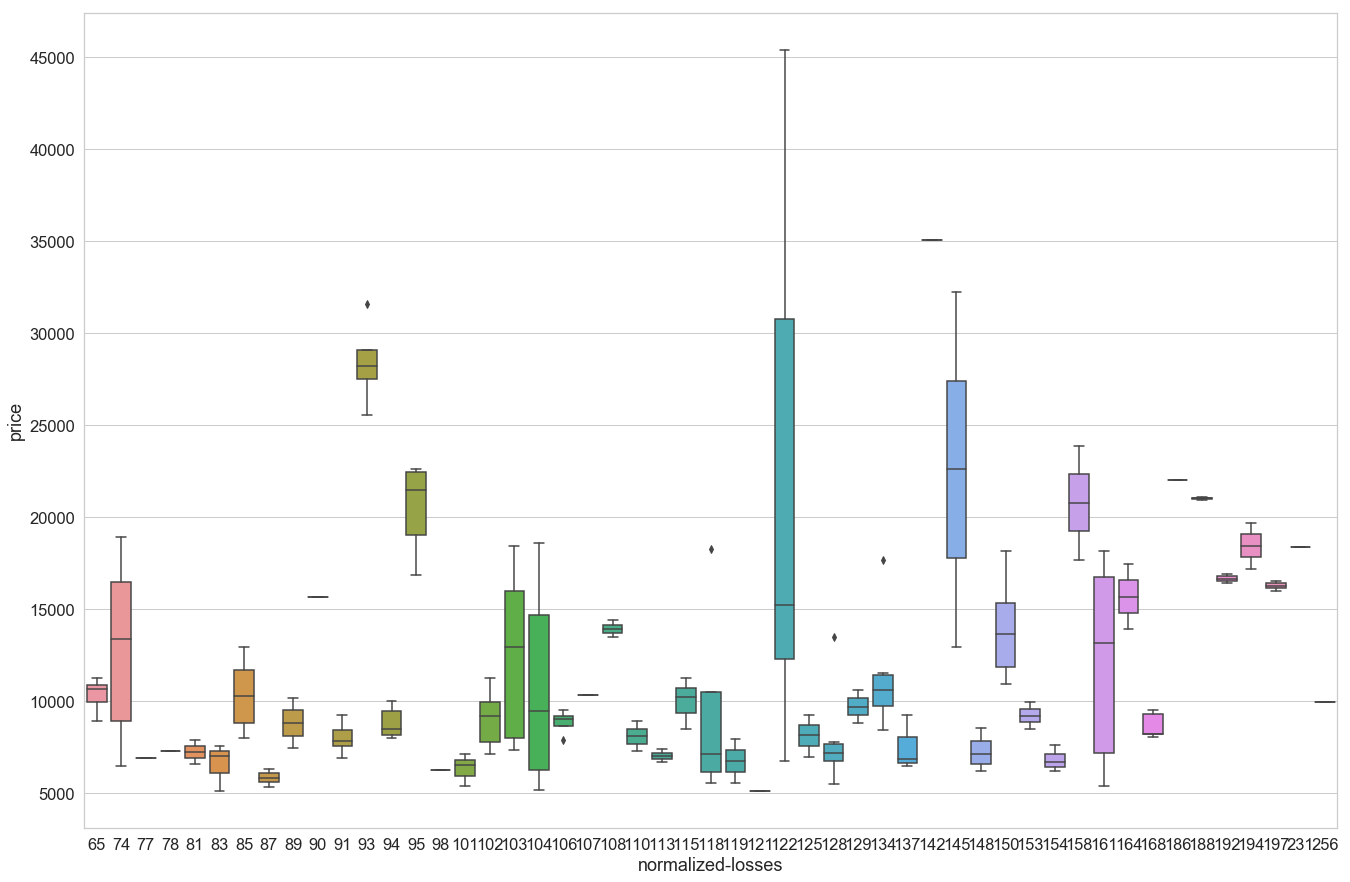

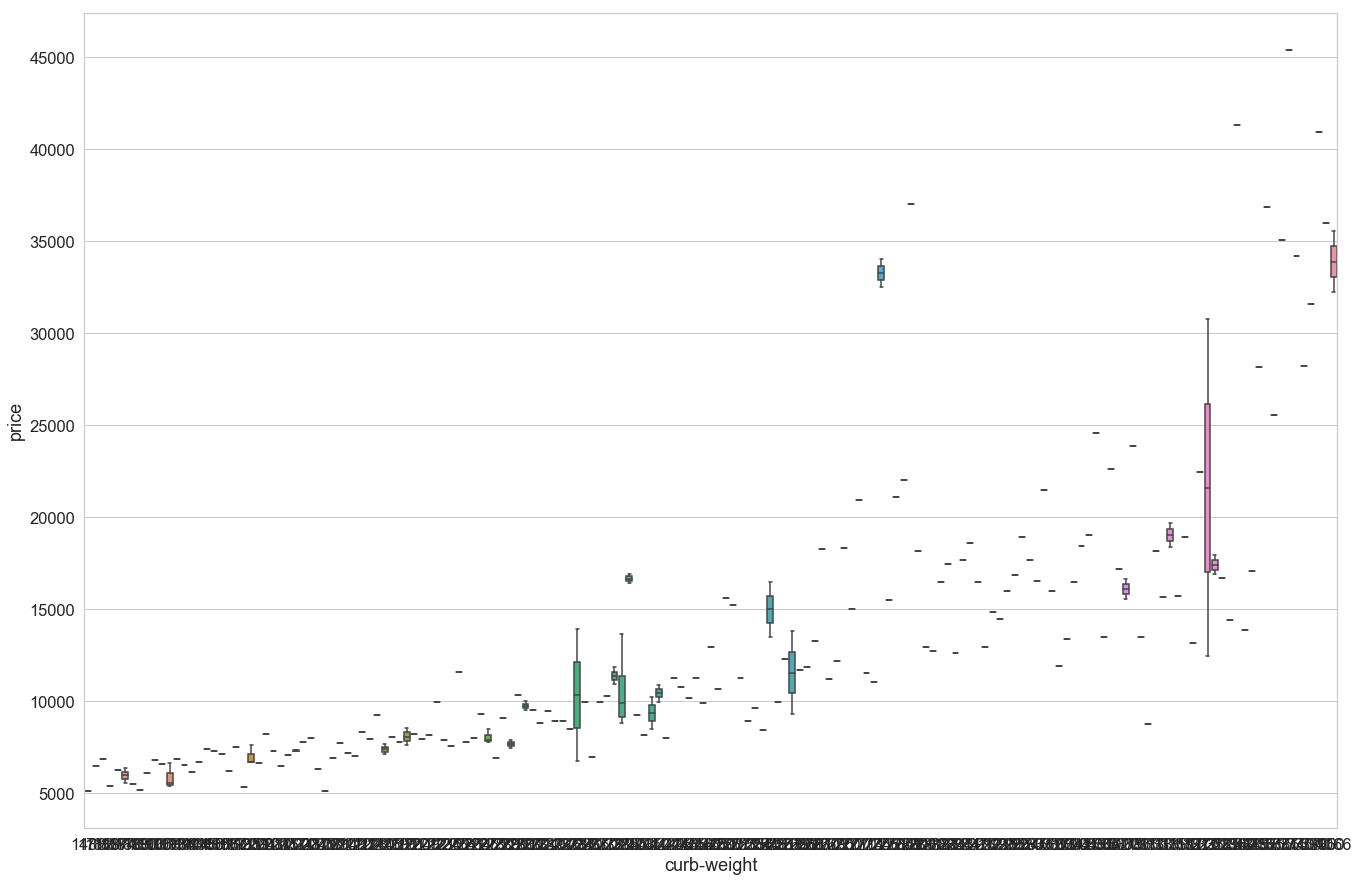

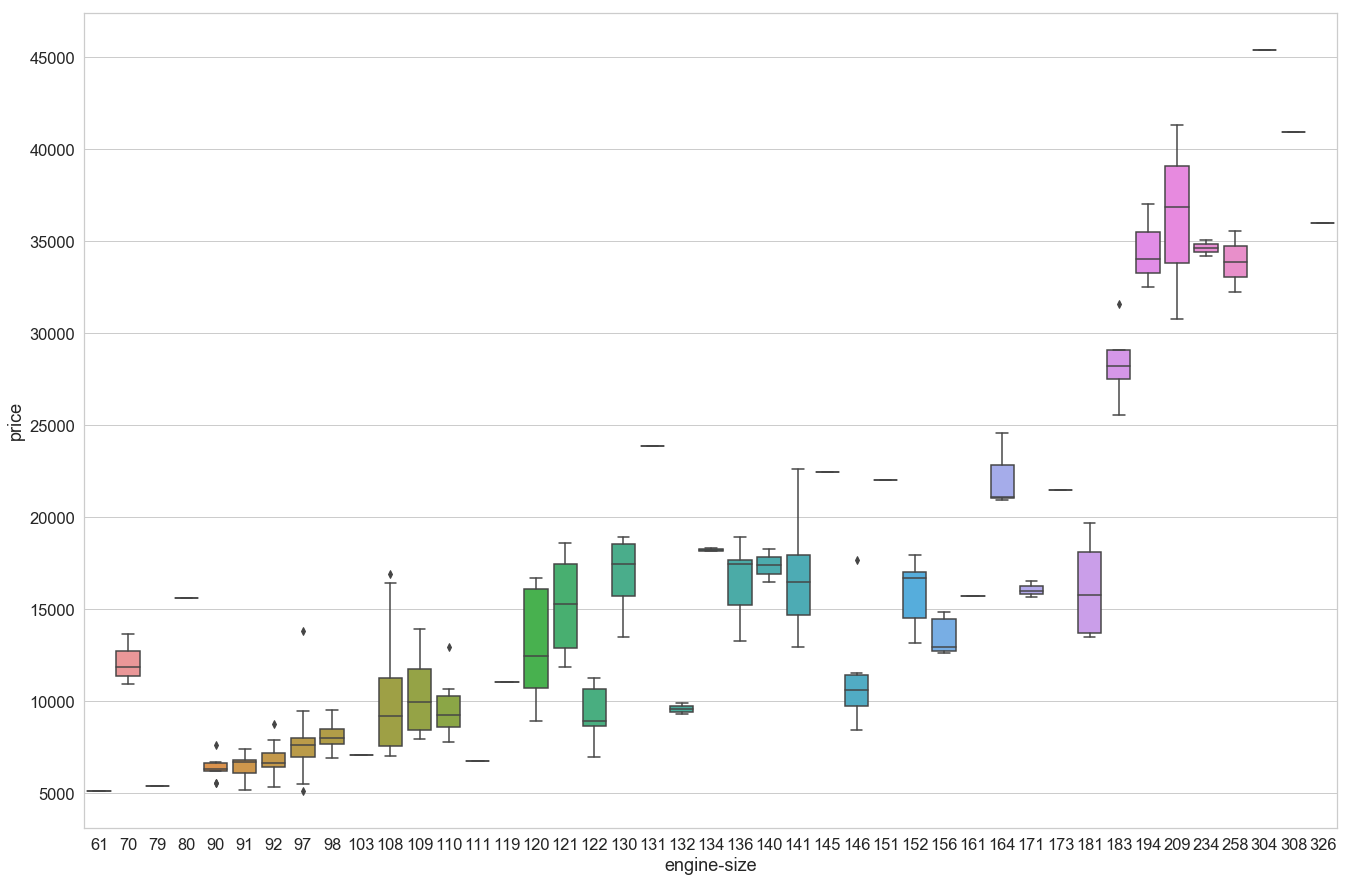

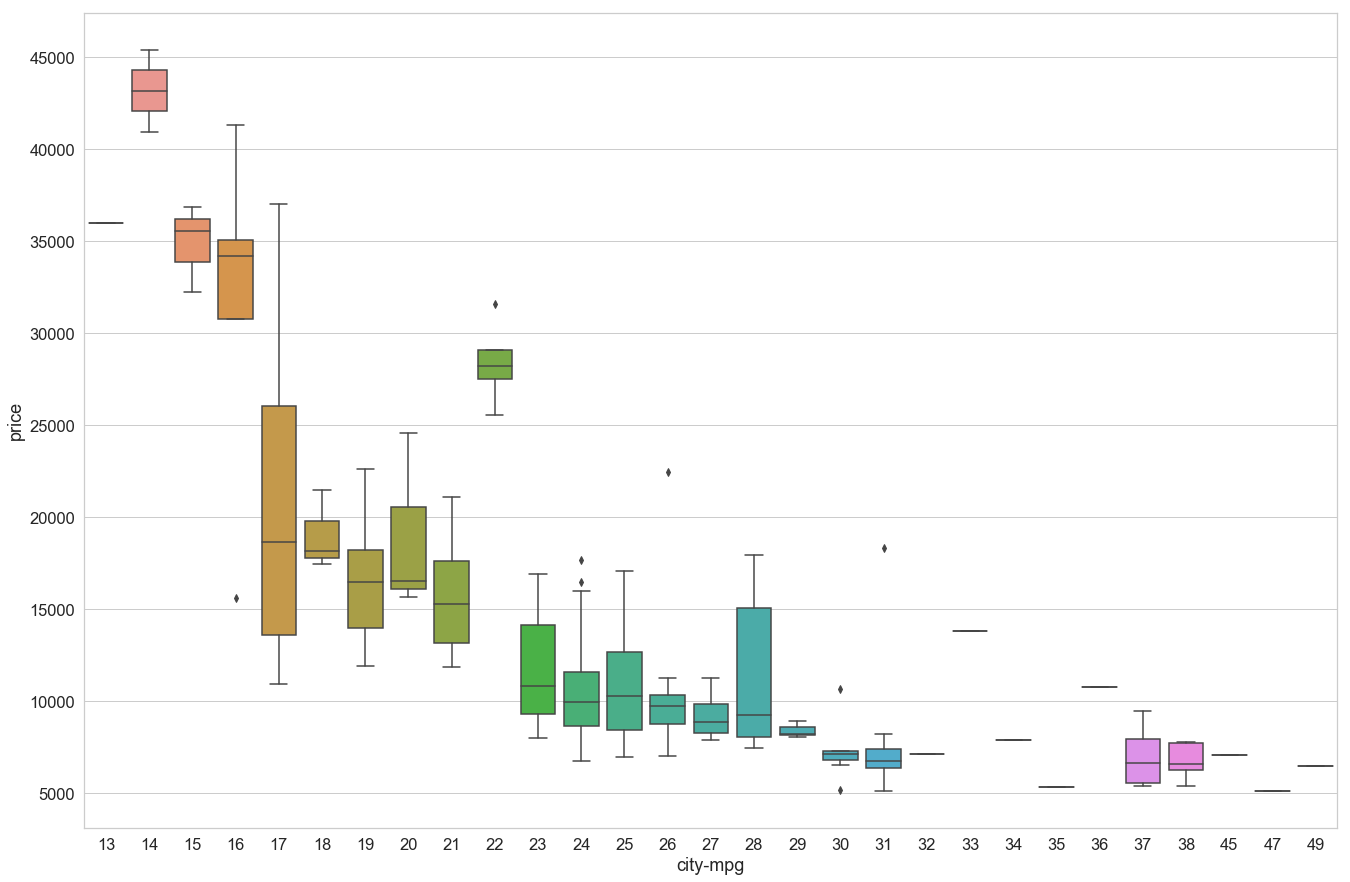

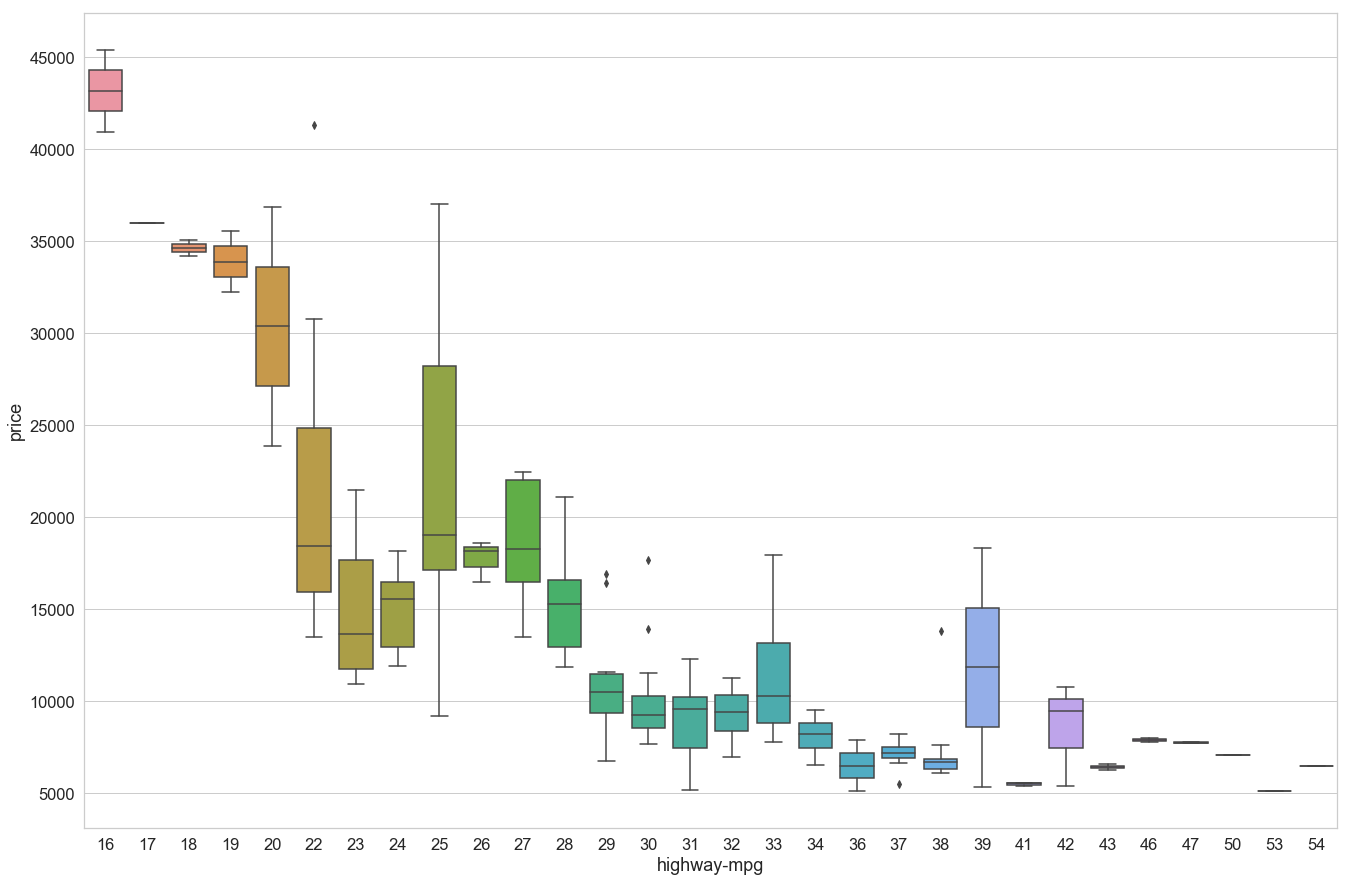

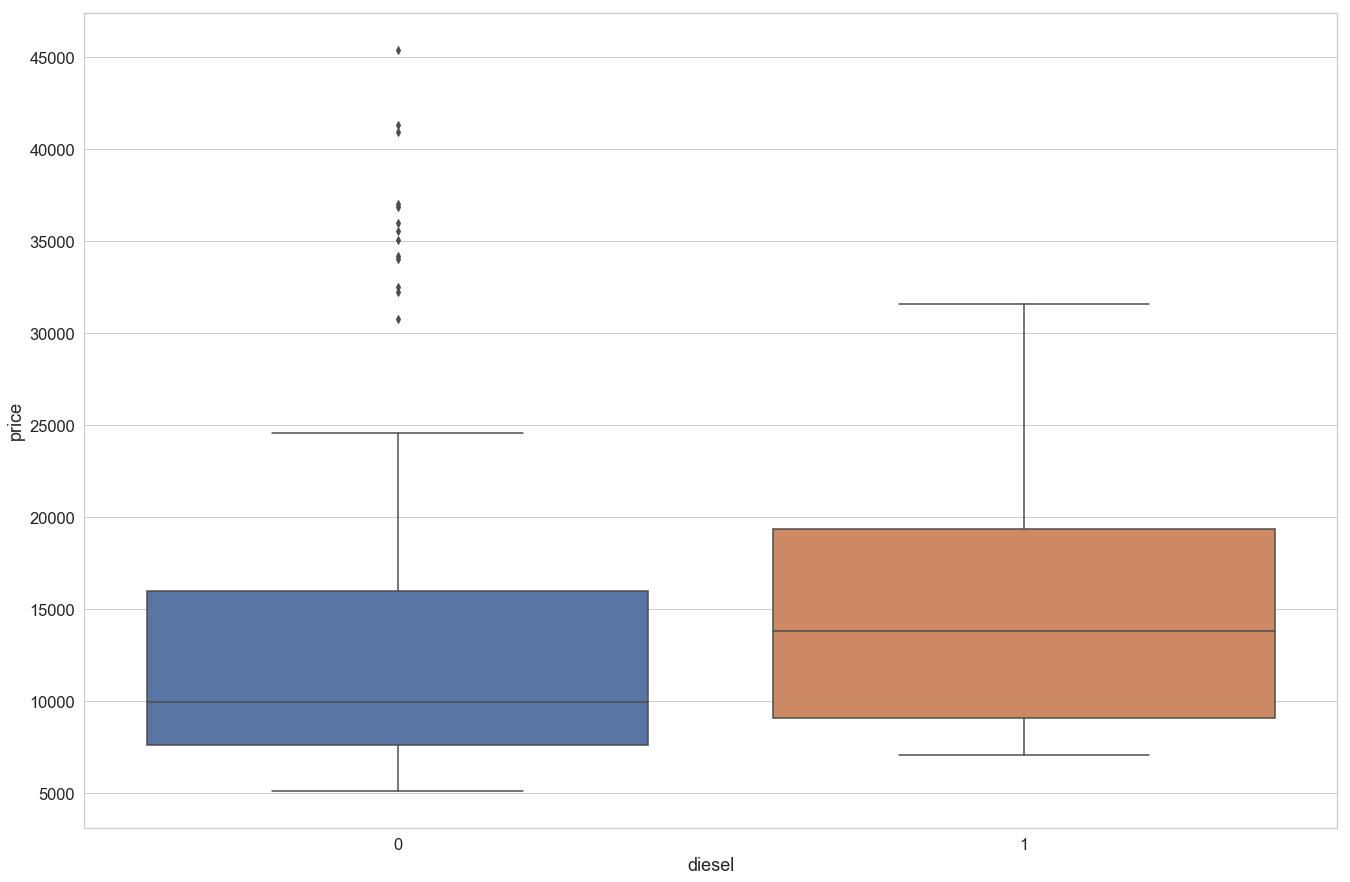

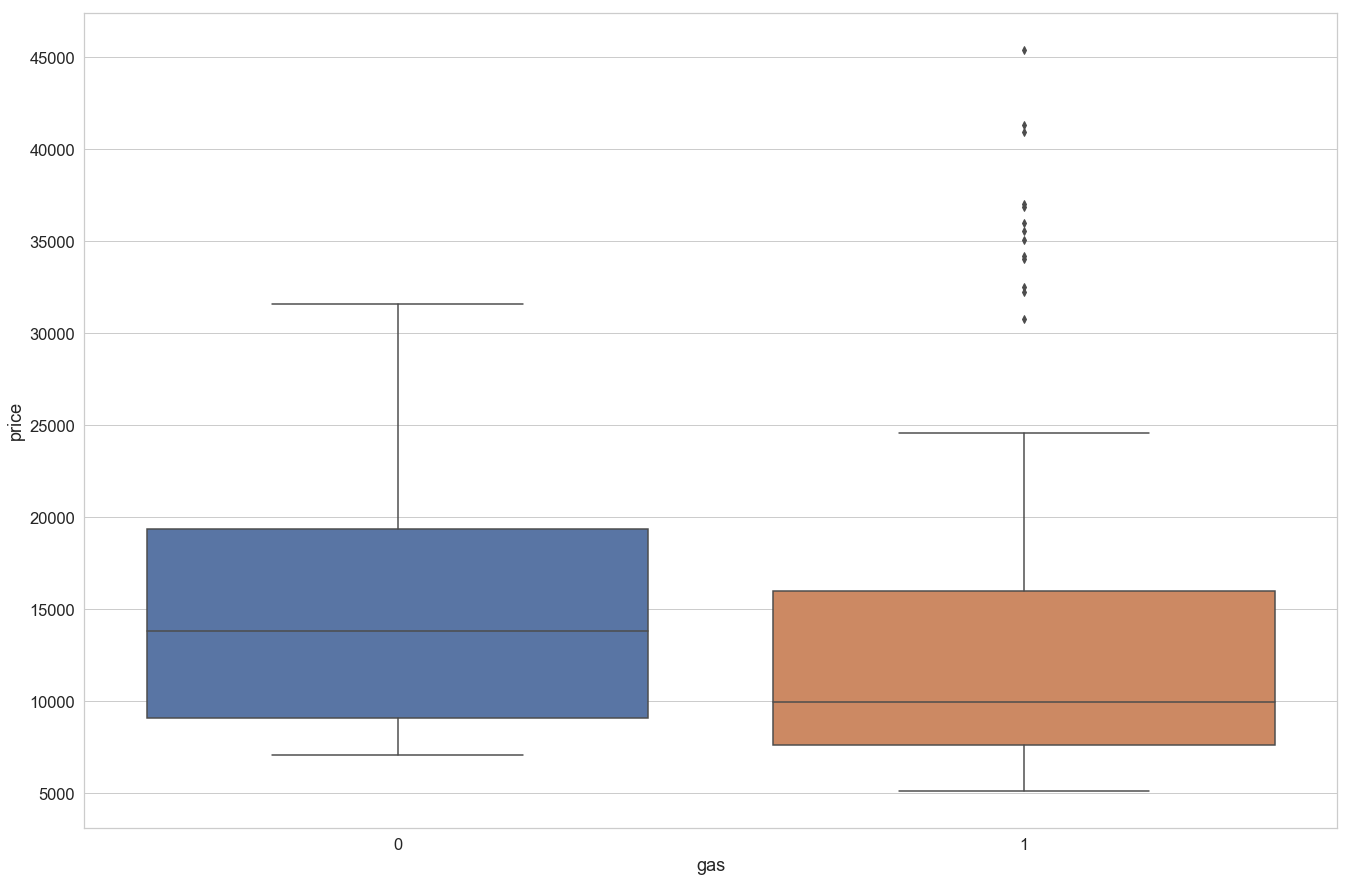

In [121]:
for key in e:
    u=e[key].columns
    plt.figure(figsize=(20, 15))
    sns.boxplot(x=u[1], y="price",data=e[key])

From the above plots, it can be observed that the distributions of price between the above characteristic and theis respective categories have a significant overlap, as such would not be a good predictor of price.

 <h2 id="import_data">5. Correlation and Causation</h2>

<p><b>Correlation</b>: a measure of the extent of interdependence between variables.</p>

<p><b>Causation</b>: the relationship between cause and effect between two variables.</p>

<p>It is important to know the difference between these two and that correlation does not imply causation. Determining correlation is much simpler  the determining causation as causation may require independent experimentation.</p>

## Pearson Correlation
    
To measure the extent of interdependence between two variables X and Y variables, Pearson Correlation can be used.

<p>The resulting coefficient is a value between -1 and 1 inclusive, where:</p>
<ul>
    <li><b>1</b>: Total positive linear correlation.</li>
    <li><b>0</b>: No linear correlation, the two variables most likely do not affect each other.</li>
    <li><b>-1</b>: Total negative linear correlation.</li>
</ul>

In [16]:
# As calculated at the start p_cor is the calculation of the Pearson Correlation 
# between Price and Car Characteristics
p_cor

symboling           -0.082391
normalized-losses    0.133999
wheel-base           0.584642
length               0.690628
width                0.751265
height               0.135486
curb-weight          0.834415
engine-size          0.872335
bore                 0.543155
stroke               0.082310
compression-ratio    0.071107
horsepower           0.809575
peak-rpm            -0.101616
city-mpg            -0.686571
highway-mpg         -0.704692
price                1.000000
city-L/100km         0.789898
diesel               0.110326
gas                 -0.110326
Name: price, dtype: float64

## P-value

<p>To measure the significance of the correlation estimate P-value can be used.
The P-value is the probability value that the correlation between these two variables is statistically significant. Normally, we choose a significance level of 0.05, which means that we are 95% confident that the correlation between the variables is significant.</p>

By convention, when the
<ul>
    <li>p-value is $<$ 0.001: we say there is strong evidence that the correlation is significant.</li>
    <li>the p-value is $<$ 0.05: there is moderate evidence that the correlation is significant.</li>
    <li>the p-value is $<$ 0.1: there is weak evidence that the correlation is significant.</li>
    <li>the p-value is $>$ 0.1: there is no evidence that the correlation is significant.</li>
</ul>

In [185]:
# Importing "stats" module in the "scipy" library.
from scipy import stats

### P-Value Calculation of Interger Type Characteristics

In [137]:
#where e are dictionaries of interger type characteristics and price
pp_int={}
for key in e:
    p_key=e[key].columns
    pearson_coef, p_value = stats.pearsonr(df[p_key[1]], df[p_key[0]])
    pp_int[p_key[1]]= pearson_coef, p_value

In [138]:
pp_int

{'symboling': (-0.08239118716962357, 0.24491487657165062),
 'normalized-losses': (0.13399873429274337, 0.057897493527030296),
 'curb-weight': (0.8344145257702846, 2.1895772388936997e-53),
 'engine-size': (0.8723351674455185, 9.265491622197996e-64),
 'city-mpg': (-0.6865710067844677, 2.3211320655676368e-29),
 'highway-mpg': (-0.7046922650589529, 1.7495471144476807e-31),
 'diesel': (0.11032556467564854, 0.11896254438091516),
 'gas': (-0.11032556467564854, 0.11896254438091516)}

## Conclusion

### Engine-size vs Price
<p>Since the p-value is $<$ 0.001, the correlation between engine-size and price is statistically significant, and the linear relationship is very strong (~0.872).</p>

### City-mpg vs Price
<p>Since the p-value is $<$ 0.001, the correlation between city-mpg and price is statistically significant, and the coefficient of ~ -0.705 shows that the relationship is negative and moderately strong.</p>

### P-Value Calculation of Float64 Type Characteristics

In [167]:
df_float=df.select_dtypes(include='float64')
col3=df_float.columns.tolist()
float64=df[col3]

In [176]:
f={}
for i in range(1,len(col3)):
    f[i]=float64[[col3[i],'price']]

In [178]:
#where f are dictionaries of float type characteristics and price
pp_flt={}
for key in f:
    pflt_key=f[key].columns
    pearson_coef, p_value = stats.pearsonr(df[pflt_key[0]], df[pflt_key[1]])
    pp_flt[pflt_key[0]]= pearson_coef, p_value

In [179]:
pp_flt

{'length': (0.690628380448364, 8.016477466159053e-30),
 'width': (0.7512653440522674, 9.200335510481426e-38),
 'height': (0.13548630756805974, 0.05514627325101211),
 'bore': (0.5431553832626602, 8.049189483935364e-17),
 'stroke': (nan, 1.0),
 'compression-ratio': (0.07110732668194143, 0.31581101887291624),
 'horsepower': (0.8095745670036559, 6.36905742825998e-48),
 'peak-rpm': (-0.10161587407588146, 0.15117691651444906),
 'price': (1.0, 0.0),
 'city-L/100km': (0.7898975136626942, 3.9031064009399405e-44)}

## Conclusion

### Horsepower vs Price
<p>Since the p-value is $<$ 0.001, the correlation between horsepower and price is statistically significant, and the linear relationship is quite strong (~0.809, close to 1)</p>

 <h2 id="import_data">6. ANOVA</h2>

<h3>ANOVA: Analysis of Variance</h3>
<p>The Analysis of Variance  (ANOVA) is a statistical method used to test whether there are significant differences between the means of two or more groups. ANOVA returns two parameters:</p>

<p><b>F-test score</b>: ANOVA assumes the means of all groups are the same, calculates how much the actual means deviate from the assumption, and reports it as the F-test score. A larger score means there is a larger difference between the means.</p>

<p><b>P-value</b>:  P-value tells how statistically significant is our calculated score value.</p>

<p>If our price variable is strongly correlated with the variable we are analyzing, expect ANOVA to return a sizeable F-test score and a small p-value.</p>

## Descriptive Statistical Analysis

<p>Let's first take a look at the variables by utilizing a description method.</p>

<p>The <b>describe</b> function automatically computes basic statistics for all continuous variables. Any NaN values are automatically skipped in these statistics.</p>

This will show:
<ul>
    <li>the count of that variable</li>
    <li>the mean</li>
    <li>the standard deviation (std)</li> 
    <li>the minimum value</li>
    <li>the IQR (Interquartile Range: 25%, 50% and 75%)</li>
    <li>the maximum value</li>
<ul>

In [190]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,197.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,0.837102,0.915126,53.766667,2555.666667,126.875622,3.330692,3.256904,10.164279,103.405534,5117.665368,25.179104,30.686567,13207.129353,9.944145,0.099502,0.900498
std,1.254802,31.99625,6.066366,0.059213,0.029187,2.447822,517.296727,41.546834,0.268072,0.319256,4.004965,37.365700,478.113805,6.423220,6.815150,7947.066342,2.534599,0.300083,0.300083
min,-2.000000,65.00000,86.600000,0.678039,0.837500,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,4.795918,0.000000,0.000000
25%,0.000000,101.00000,94.500000,0.801538,0.890278,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000,7.833333,0.000000,1.000000
50%,1.000000,122.00000,97.000000,0.832292,0.909722,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5125.369458,24.000000,30.000000,10295.000000,9.791667,0.000000,1.000000
75%,2.000000,137.00000,102.400000,0.881788,0.925000,55.500000,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000,12.368421,0.000000,1.000000
max,3.000000,256.00000,120.900000,1.000000,1.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000,18.076923,1.000000,1.000000


In [191]:
#describe on variable type objects
df.describe(include=['object'])

,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,horsepower-binned
count,201,201,201,201,201,201,201,201,201,200
unique,22,2,2,5,3,2,6,7,8,3
top,toyota,std,four,sedan,fwd,front,ohc,four,mpfi,Low
freq,32,165,115,94,118,198,145,157,92,115


### Value Counts

In [195]:
drive_wheels_counts = df['drive-wheels'].value_counts().to_frame()
drive_wheels_counts.rename(columns={'drive-wheels': 'value_counts'}, inplace=True)
drive_wheels_counts

,value_counts
fwd,118
rwd,75
4wd,8


In [196]:
drive_wheels_counts.index.name = 'drive-wheels'
drive_wheels_counts

,value_counts
drive-wheels,
fwd,118
rwd,75
4wd,8


<p>Examining the value counts of drive wheels would be a good predictor variable for the price. This is because the number of cars in each category varies. Thus, we are able to draw conclusions about the drive wheels.</p>

In [197]:
# engine-location as variable
engine_loc_counts = df['engine-location'].value_counts().to_frame()
engine_loc_counts.rename(columns={'engine-location': 'value_counts'}, inplace=True)
engine_loc_counts.index.name = 'engine-location'
engine_loc_counts.head(10)

,value_counts
engine-location,
front,198
rear,3


<p>Examining the value counts of the engine location would not be a good predictor variable for the price. This is because we only have three cars with a rear engine and 198 with an engine in the front, this result is skewed. Thus, we are not able to draw any conclusions about the engine location.</p>

### Grouping

<p>The "groupby" method groups data by different categories. The data is grouped based on one or several variables and analysis is performed on the individual groups.</p>

<p>Select the columns 'drive-wheels', 'body-style' and 'price', then assign it to the variable "df_gptest".</p>

We can then calculate the average price for each of the different categories of data.

In [200]:
# grouping results
df_group_one = df_group_one.groupby(['drive-wheels'],as_index=False).mean()
df_group_one

,drive-wheels,price
0,4wd,10241.000000
1,fwd,9244.779661
2,rwd,19757.613333


<p>From our data, it seems rear-wheel drive vehicles are, on average, the most expensive, while 4-wheel and front-wheel are approximately the same in price.</p>

<p>You can also group with multiple variables. For example, let's group by both 'drive-wheels' and 'body-style'. This groups the dataframe by the unique combinations 'drive-wheels' and 'body-style'. We can store the results in the variable 'grouped_test1'.</p>

### Group by Drive Wheels and Body-Style

In [201]:
# grouping results
df_gptest = df[['drive-wheels','body-style','price']]
grouped_test1 = df_gptest.groupby(['drive-wheels','body-style'],as_index=False).mean()
grouped_test1

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


<p>The grouped data is made into a pivot table for easy visualisation.</p>

<p>In this case, we will leave the drive-wheel variable as the rows of the table, and pivot body-style to become the columns of the table:</p>

In [202]:
grouped_pivot = grouped_test1.pivot(index='drive-wheels',columns='body-style')
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

In [203]:
grouped_pivot = grouped_pivot.fillna(0) #fill missing values with 0
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  0.0      0.000000   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

<p>Use the "groupby" function to find the average "price" of each car based on "body-style"</p>

In [205]:
# Write your code below and press Shift+Enter to execute 
df_gptest2 = df[['body-style','price']]
grouped_test_bodystyle = df_gptest2.groupby(['body-style'],as_index= False).mean()
grouped_test_bodystyle

,body-style,price
0,convertible,21890.500000
1,hardtop,22208.500000
2,hatchback,9957.441176
3,sedan,14459.755319
4,wagon,12371.960000


<p>Missing cells are replaced with the value 0.</p>

#### Drive Wheels

<p>Since ANOVA analyzes the difference between different groups of the same variable, the groupby function will come in handy. Because the ANOVA algorithm averages the data automatically, we do not need to take the average before hand.</p>

<p>Let's see if different types 'drive-wheels' impact  'price', we group the data.</p>

In [208]:
grouped_test2=df_gptest[['drive-wheels', 'price']].groupby(['drive-wheels'])
grouped_test2.head(2)

,drive-wheels,price
0,rwd,13495.0
1,rwd,16500.0
3,fwd,13950.0
4,4wd,17450.0
5,fwd,15250.0
136,4wd,7603.0


In [209]:
df_gptest

,drive-wheels,body-style,price
0,rwd,convertible,13495.0
1,rwd,convertible,16500.0
2,rwd,hatchback,16500.0
3,fwd,sedan,13950.0
4,4wd,sedan,17450.0
5,fwd,sedan,15250.0
6,fwd,sedan,17710.0
7,fwd,wagon,18920.0
8,fwd,sedan,23875.0
9,rwd,sedan,16430.0


In [210]:
grouped_test2.get_group('4wd')['price']

4      17450.0
136     7603.0
140     9233.0
141    11259.0
144     8013.0
145    11694.0
150     7898.0
151     8778.0
Name: price, dtype: float64

### Function 'f_oneway' in the module 'stats'  to obtain the F-test score and P-value

In [211]:
 # ANOVA
f_val, p_val = stats.f_oneway(grouped_test2.get_group('fwd')['price'], grouped_test2.get_group('rwd')['price'], grouped_test2.get_group('4wd')['price'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val)

ANOVA results: F= 67.95406500780399 , P = 3.3945443577151245e-23


A large F test score shows a strong correlation between fwd, rwd and 4wd. A P value of almost 0 implying almost certain statistical significance. Determinations of all three tested groups are all this highly correlated.

#### Separately: fwd and rwd

In [213]:
f_val, p_val = stats.f_oneway(grouped_test2.get_group('fwd')['price'], grouped_test2.get_group('rwd')['price'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val )

ANOVA results: F= 130.5533160959111 , P = 2.2355306355677845e-23


#### 4wd and rwd

In [214]:
f_val, p_val = stats.f_oneway(grouped_test2.get_group('4wd')['price'], grouped_test2.get_group('rwd')['price'])  
   
print( "ANOVA results: F=", f_val, ", P =", p_val)

ANOVA results: F= 8.580681368924756 , P = 0.004411492211225333


<h4>4wd and fwd</h4>

In [216]:
f_val, p_val = stats.f_oneway(grouped_test2.get_group('4wd')['price'], grouped_test2.get_group('fwd')['price'])  
 
print("ANOVA results: F=", f_val, ", P =", p_val)  

ANOVA results: F= 0.665465750252303 , P = 0.41620116697845666


## Conclusion: Important Variables

<p>The variables that are important to take into account when predicting the car price. We have narrowed it down to the following variables:</p>

Continuous numerical variables:
<ul>
    <li>Length</li>
    <li>Width</li>
    <li>Curb-weight</li>
    <li>Engine-size</li>
    <li>Horsepower</li>
    <li>City-mpg</li>
    <li>Highway-mpg</li>
    <li>Wheel-base</li>
    <li>Bore</li>
</ul>
    
Categorical variables:
<ul>
    <li>Drive-wheels</li>
</ul>

<p>Building machine learning models to automate our analysis would require feeding the model with variables that meaningfully affect our target variable will improve our model's prediction performance.</p>

<hr>
<p>Copyright &copy; 2018 IBM Developer Skills Network. This notebook and its source code are released under the terms of the <a href="https://cognitiveclass.ai/mit-license/">MIT License</a>.</p>